   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

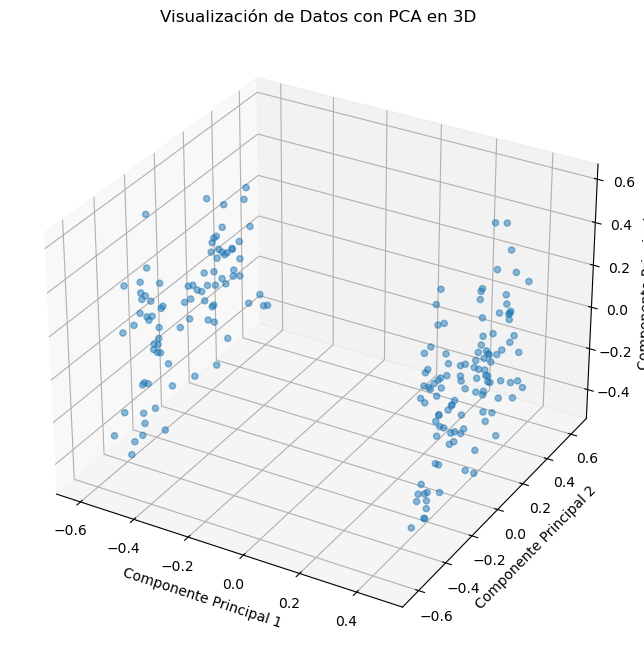

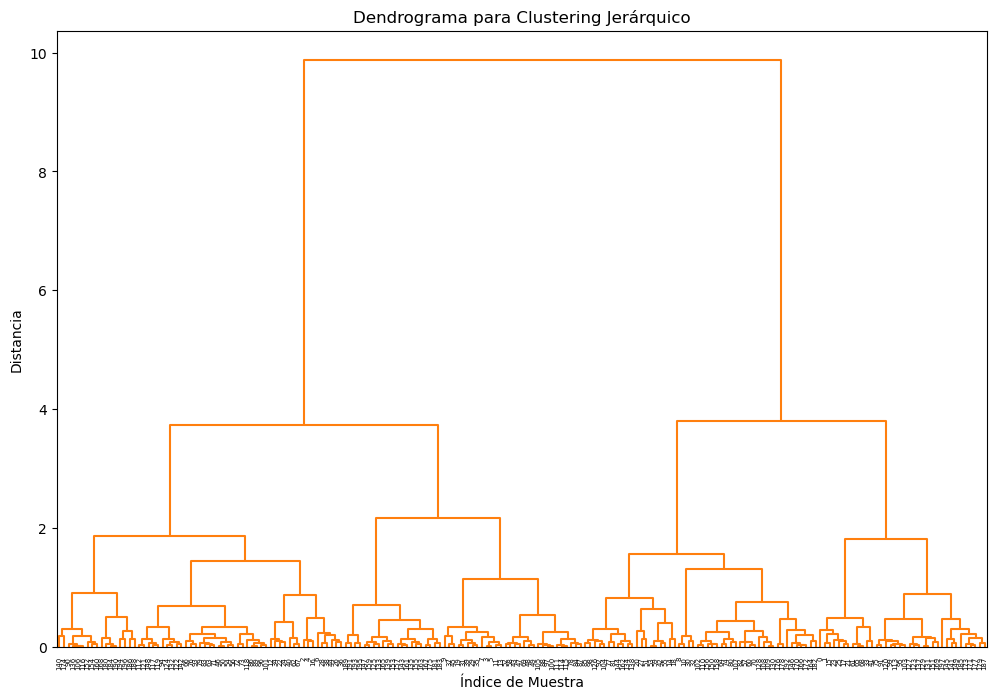

Coeficiente de Silhouette: 0.441240244549789
Índice de Calinski-Harabasz: 281.58191130323155
Índice de Davies-Bouldin: 0.8794795012617262


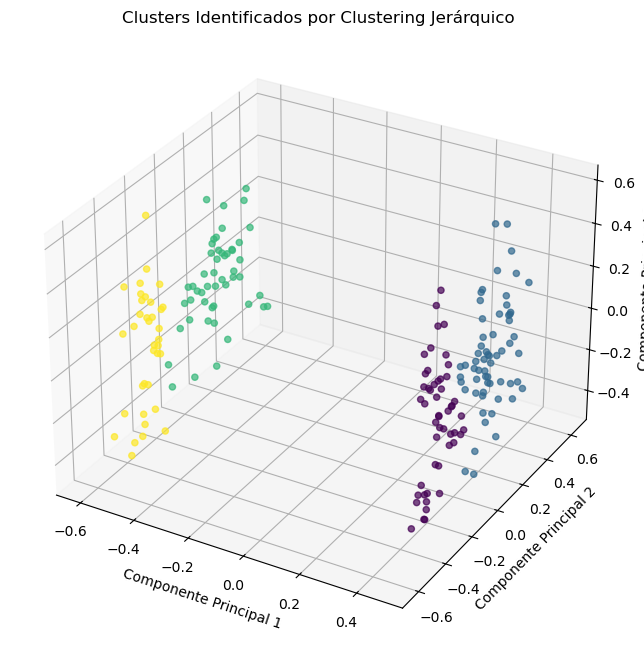

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

# Configuración para evitar múltiples advertencias
warnings.filterwarnings('ignore')

# Carga del dataset
data = pd.read_csv('Mall_Customers.csv')

# Mostrar una vista previa de los datos para entender la estructura inicial
print(data.head())

# Descripción estadística de las variables para entender tendencias y distribuciones
print(data.describe())

# Información general para identificar valores nulos y tipos de datos
print(data.info())

# Eliminación de la columna 'CustomerID' ya que no contribuye al análisis
data = data.drop(columns=['CustomerID'])

# Codificación de 'Gender' en valores numéricos para facilitar el análisis
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Comprobación de valores nulos en el dataset
print(data.isnull().sum())

# Eliminación de outliers usando el rango intercuartílico (IQR) para mejorar la calidad del clustering
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Escalado de las variables numéricas utilizando MinMaxScaler para mantener los valores entre 0 y 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Reducción de dimensionalidad con PCA a 3 componentes principales para facilitar la visualización y análisis
data_pca = PCA(n_components=3).fit_transform(data_scaled)

# Visualización de los resultados de PCA en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], alpha=0.5)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Visualización de Datos con PCA en 3D')
plt.show()

# Generación de la matriz de linkage para la visualización del dendrograma
linkage_matrix = linkage(data_pca, method='ward')

# Visualización del dendrograma con un corte para indicar el número de clusters sugeridos
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=100)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.axhline(y=100, color='r', linestyle='--')  # Línea para sugerir el corte
plt.show()

# Definición del número óptimo de clusters según el dendrograma
optimal_clusters = 4

# Entrenamiento del modelo Agglomerative Clustering con los parámetros seleccionados
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(data_pca)

# Adición de las etiquetas de clusters al dataframe original
data['Cluster'] = labels

# Cálculo de métricas de evaluación para medir la calidad del clustering
silhouette_avg = silhouette_score(data_pca, labels)
calinski_harabasz = calinski_harabasz_score(data_pca, labels)
davies_bouldin = davies_bouldin_score(data_pca, labels)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")

# Visualización de los clusters resultantes en el espacio reducido por PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels, cmap='viridis', alpha=0.7)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Clusters Identificados por Clustering Jerárquico')
plt.show()
